### import some library

In [27]:
import tensorflow as tf
import numpy as np

import matplotlib.pyplot as plt

### one neutral 

In [39]:
# creat data
#創造 亂數100個亂數 值介於0~1之間
x_data = np.random.rand(100).astype(np.float32)

#訂出要學習的函數  這裡要學的是 weight:0.1  biases:0.3
y_data = 0.1 * (x_data) + 0.3

###creat tensorflow structure start###
#定立 weights 的 範圍 和初始化
Weights = tf.Variable(tf.random_uniform([1],-1.0,1.0))
biases = tf.Variable(tf.zeros([1]))

#定立 給 tensorflow 學習的函數
y = Weights * (x_data) + biases

#建立 loss 規則
loss = tf.reduce_mean(tf.square(y-y_data))

#選擇學習機制
optimizer = tf.train.GradientDescentOptimizer(0.5)  #learning rate

#像tensorflow 說 訓練規則就是把 loss 減到最小 最好是0
train = optimizer.minimize(loss)

#初始化所有變數
init = tf.initialize_all_variables()

###creat tensorflow structure end###
#上面都是建立規則
#*****************************************************開始訓練
#建立sess
sess = tf.Session()

#記得初始化
sess.run(init)     #Very important

"""
跑 for 迴圈 更新wight201次
然後每訓練20次 印出一次weight
"""
for step in range(501):
    sess.run(train)
    if step % 50 ==0:
        print(step,sess.run(Weights),sess.run(biases))

Instructions for updating:
Use `tf.global_variables_initializer` instead.
(0, array([ 0.80714464], dtype=float32), array([-0.12440021], dtype=float32))
(50, array([ 0.1219927], dtype=float32), array([ 0.28811476], dtype=float32))
(100, array([ 0.10066733], dtype=float32), array([ 0.29963937], dtype=float32))
(150, array([ 0.10002025], dtype=float32), array([ 0.29998907], dtype=float32))
(200, array([ 0.10000062], dtype=float32), array([ 0.29999968], dtype=float32))
(250, array([ 0.10000009], dtype=float32), array([ 0.29999995], dtype=float32))
(300, array([ 0.10000009], dtype=float32), array([ 0.29999995], dtype=float32))
(350, array([ 0.10000009], dtype=float32), array([ 0.29999995], dtype=float32))
(400, array([ 0.10000009], dtype=float32), array([ 0.29999995], dtype=float32))
(450, array([ 0.10000009], dtype=float32), array([ 0.29999995], dtype=float32))
(500, array([ 0.10000009], dtype=float32), array([ 0.29999995], dtype=float32))


In [42]:
# creat data
#創造 亂數100個亂數 值介於0~1之間
x_data = np.random.rand(100).astype(np.float32)

#訂出要學習的函數  這裡要學的是 weight:0.1  biases:0.3
y_data = 0.1 * x_data + 0.3

###creat tensorflow structure start###
#定立 weights 的 範圍 和初始化
Weights = tf.Variable(tf.random_uniform([1],-1.0,1.0))
biases = tf.Variable(tf.zeros([1]))

#定立 給 tensorflow 學習的函數
y = Weights * (x_data) + biases

#建立 loss 規則
loss = tf.reduce_mean(tf.square(y-y_data))

#選擇學習機制
optimizer = tf.train.GradientDescentOptimizer(0.5)  #learning rate

#像tensorflow 說 訓練規則就是把 loss 減到最小 最好是0
train = optimizer.minimize(loss)

#初始化所有變數
init = tf.initialize_all_variables()

###creat tensorflow structure end###
#上面都是建立規則
#*****************************************************開始訓練
#建立sess
sess = tf.Session()

#記得初始化
sess.run(init)     #Very important

"""
跑 for 迴圈 更新wight201次
然後每訓練20次 印出一次weight
"""
for step in range(501):
    sess.run(train)
    if step % 50 ==0:
        print(step,sess.run(Weights),sess.run(biases))

Instructions for updating:
Use `tf.global_variables_initializer` instead.
(0, array([ 0.44523963], dtype=float32), array([ 0.15581958], dtype=float32))
(50, array([ 0.11388892], dtype=float32), array([ 0.29265261], dtype=float32))
(100, array([ 0.10058574], dtype=float32), array([ 0.29969016], dtype=float32))
(150, array([ 0.10002471], dtype=float32), array([ 0.29998693], dtype=float32))
(200, array([ 0.10000106], dtype=float32), array([ 0.29999945], dtype=float32))
(250, array([ 0.10000011], dtype=float32), array([ 0.29999995], dtype=float32))
(300, array([ 0.10000011], dtype=float32), array([ 0.29999995], dtype=float32))
(350, array([ 0.10000011], dtype=float32), array([ 0.29999995], dtype=float32))
(400, array([ 0.10000011], dtype=float32), array([ 0.29999995], dtype=float32))
(450, array([ 0.10000011], dtype=float32), array([ 0.29999995], dtype=float32))
(500, array([ 0.10000011], dtype=float32), array([ 0.29999995], dtype=float32))


In [43]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [48]:
#定義layer
def add_layer(inputs, in_size, out_size, activation_function=None):
    Weights = tf.Variable(tf.random_normal([in_size, out_size]))
    biases = tf.Variable(tf.zeros([1, out_size]) + 0.1)
    Wx_plus_b = tf.matmul(inputs, Weights) + biases   

    #自由選擇激活函數
    if activation_function is None:
        outputs = Wx_plus_b
    else:
        outputs = activation_function(Wx_plus_b)
    return outputs

# 給tensorflow 一個placeholder 隨時置換數據 None 表示會自己計算出放了多少組數據
# 像這裡 None 就會自動放入300組 因為我們等等會放入300組數據訓練 
xs = tf.placeholder(tf.float32, [None, 1])
ys = tf.placeholder(tf.float32, [None, 1])

#組裝神經網路
# add hidden layer
l1 = add_layer(xs, 1, 10, activation_function=tf.nn.relu)
# add output layer
prediction = add_layer(l1, 10, 1, activation_function=None)

# 定義loss function 並且選擇減低loss 的函數 這裡選擇GradientDescentOptimizer
# 其他方法再這裡可以找到 https://www.tensorflow.org/versions/r0.10/api_docs/python/train.html
loss = tf.reduce_mean(tf.reduce_sum(tf.square(ys - prediction),reduction_indices=[1]))
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

In [68]:
#接下來製造一些數據和雜訊吧 
#製造出範圍為-1~1之間的 row:300 col:1 矩陣
x_data = np.linspace(-1,1,300)[:, np.newaxis]
noise = np.random.normal(0, 0.8, x_data.shape)

#製造出要讓網路學習的Y 並加上雜訊
y_data = np.square(x_data) - 0.5 + noise

In [69]:
#全部設定好了之後 記得初始化喔
init = tf.initialize_all_variables()
sess = tf.Session()
sess.run(init)

Instructions for updating:
Use `tf.global_variables_initializer` instead.


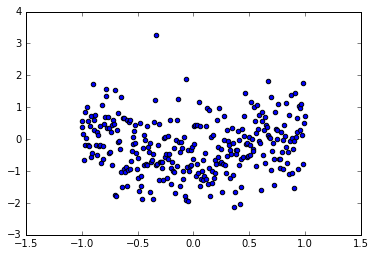

In [70]:
# 為了可以可視化我們訓練的結果
def showResult():
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.scatter(x_data, y_data)
    plt.ion()
    plt.show()
    return ax
ax = showResult()

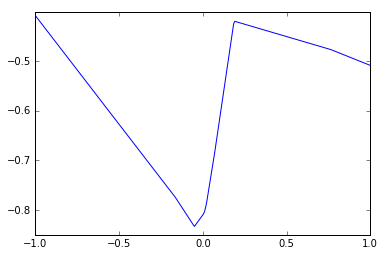

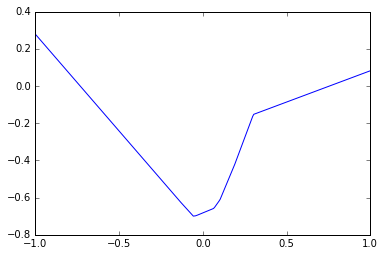

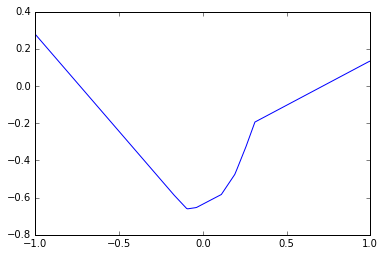

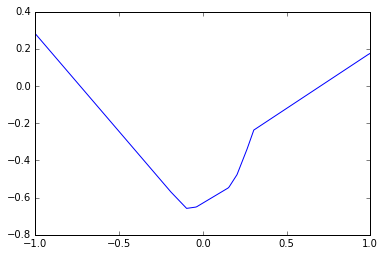

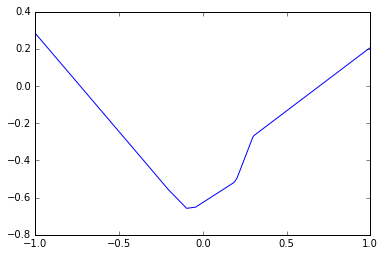

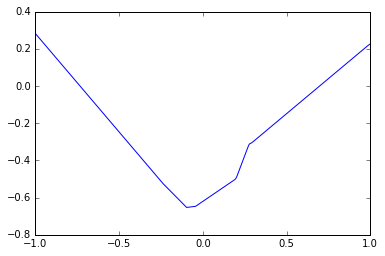

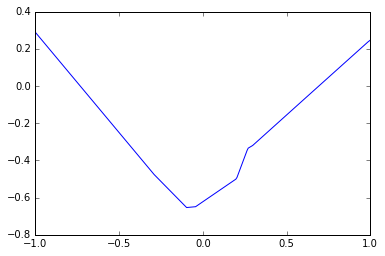

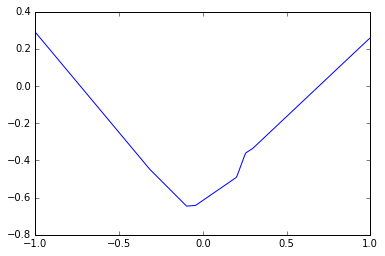

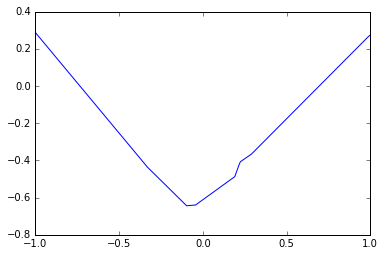

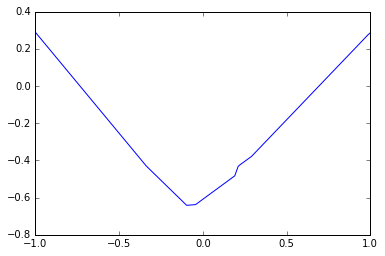

In [71]:
# 之後就可以用for迴圈訓練了
for i in range(1000):
   
     # 整個訓練最核心的code , feed_dict 表示餵入 輸入與輸出
     # x_data:[300,1]   y_data:[300,1]
    sess.run(train_step, feed_dict={xs: x_data, ys: y_data})
    if i % 100 == 0:
        # 畫出下一條線之前 必須把前一條線刪除掉 不然會看不出學習成果
        try:
            ax.lines.remove(lines[0])
        except Exception:
            pass
        
        # 要取出預測的數值 必須再run 一次才能取出
        prediction_value = sess.run(prediction, feed_dict={xs: x_data})
        # 每隔0.1 秒畫出來
        lines = ax.plot(x_data, prediction_value, 'r-', lw=5)
        #showResult()
        plt.plot(x_data, prediction_value)
        plt.show()

In [ ]:
print 'hello'